<a href="https://colab.research.google.com/github/cpython-projects/python_da_06_11_25/blob/main/lesson_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from google.colab import files
import plotly.express as px
import plotly.graph_objects as go
from google.colab import files

import warnings
warnings.filterwarnings("ignore")

# **1. Що таке сезонність**

## 1.1 Визначення

Коли ми говоримо про сезонність, ми говоримо **не про календарні пори року**, а про повторювані цикли в даних. Це може бути що завгодно: година, день, тиждень, місяць, квартал або навіть 10-хвилинні інтервали — якщо в них є стійкий патерн.

**Сезонність** — це повторюваний і стійкий патерн поведінки часовго ряду, який виникає з фіксованою періодичністю.
Тобто — це щось, що повторюється *регулярно та передбачувано*.

**Часовий ряд (time series)** — це набір значень, упорядкованих у часі, зазвичай з фіксованою частотою (година, день, тиждень, місяць).
Найголовніша властивість: порядок часу має значення, і переставляти рядки не можна.

Сезонність — це одна з ключових речей, без яких **неможливо робити правильний аналіз даних**.

**Сезонність допомагає**:

1. **Прогнозувати завантаження та попит**
   Приклад: у енергетичного оператора щодня о 19:00 фіксується пік споживання. Це стабільно з року в рік → отже, можна планувати генерацію потужностей.

2. **Знаходити аномалії**
   Якщо зазвичай у суботу трафік у 1.8–2.2 раза вищий, а сьогодні він раптово нижчий → це привід для розслідування.
   TSA Air Travel Data (США) показують колосальний спад польотів 25 грудня щороку → якщо в один рік різкого спаду немає — це аномалія.

3. **Оптимізувати бюджети**
   Ритейлер Walmart демонструє пік продажів у листопаді–грудні (Black Friday → Christmas). Якщо маркетолог «забуде» про сезонність, він просто зіллє бюджет у жовтні.

4. **Покращувати прогнозні моделі**
   Моделі ARIMA, Prophet і навіть лінійна регресія потребують **dummy-змінних за місяцями / днями тижня**.

## 1.2 Які типи сезонності бувають і як їх відрізняти

Сезонність буває кількох видів. Найважливіший критерій — **період повторення патерна**.
У Pandas тип сезонності можна відрізнити за групуванням за часом, а на графіках — за повторюваними піками / провалами.

---

### 1. Щоденна (внутрішньодобова) сезонність

Період: 24 години
Повторювані патерни всередині дня.

#### Приклади

* Споживання електроенергії PJM: **пік увечері (18–20 годин), мінімум уночі (3–5 годин)**.
* Трафік сайту: піки вранці та ввечері, провал глибокої ночі.
* Поїздки Uber: пік уночі в п’ятницю / суботу, провал зранку.

**Ознака:** на графіку чіткий «хвилеподібний» цикл у межах доби.

---

### 2. Тижнева сезонність

Період: 7 днів
Повторення за днями тижня.

#### Приклади

* Трафік сайту: **будні < вихідні** (коли люди вдома).
* Відвідуваність спортзалів: **понеділок — найзавантаженіший день**, субота — спад.
* Пасажиропотік TSA: субота — мінімум.

**Ознака:** одні дні тижня стабільно високі, інші — стабільно низькі.

---

### 3. Місячна сезонність

Період: 12 місяців
Повторення: щороку ті самі місяці повторюються з піками та провалами.

#### Приклади

* Продажі Walmart: пік у листопаді–грудні.
* Споживання газу: пік узимку.
* Туризм: пік улітку.

**Ознака:** на графіку одні місяці завжди вищі за інші.

---

### 4. Річна сезонність

Період: 1 рік
Повторення за роками на великих інтервалах.

Це рідкісний випадок у звичайній бізнес-аналітиці, але трапляється при:

* багаторічній статистиці погоди
* макроекономічних даних
* сільському господарстві (врожайність)

**Ознака:** дані коливаються з року в рік не випадково, а повторюються за циклами.

---

### 5. «Нестандартна» сезонність (цикл ≠ календарю)

Період визначається не датою, а бізнес-процесом.

#### Приклади

* Call-центр: зміни по 6 годин → цикл = 6 годин.
* Виробництво: 4 зміни → цикл = 8 годин.
* Мобільна гра: івенти щоп’ятниці → цикл = 7 днів.
* Завантаження кур’єрської служби: піки перед 18:00, коли зачиняються магазини.

**Ознака:** дані «дихають» у межах внутрішніх циклів компанії.

---

### 6. Множинна сезонність

Період: кілька циклів одночасно.

#### Приклади

* Електроенергія: внутрішньодобова + сезон року.
* Трафік сайту: щоденна + тижнева.
* Продажі: місячна + внутрішньотижнева.

Тобто в даних є кілька патернів:
📉 щодня — своя міні-хвиля
📉 щотижня — є неділя
📈 кожного грудня — пік продажів

**Ознака:** графік виглядає як «хвиля всередині хвилі».

---

## Головний критерій: повторюваність

Сезонність — це не просто «вчора був пік, сьогодні — провал».

Вона повинна:

* повторюватися
* бути регулярною
* мати фіксований період

І лише тоді це сезонність, а не шум чи тренд.

# **2. Підготовка часових даних у Pandas**


In [4]:
data = [
    {"date": "2024/01/01", "value": 103.1},
    {"date": "2024/01/02", "value": 100.4},
    {"date": "2024/01/04", "value": 111.8},  # 01-03 пропущено
    {"date": "2024/01/05", "value": 99.7},
    {"date": "2024/01/06", "value": 95.1},
    {"date": "2024/01/07", "value": 104.3},
    {"date": "01-15-2024", "value": 98.5},   # інший формат
    {"date": "2024/01/08", "value": 105.2},
    {"date": "2024/01/08", "value": 105.2},  # дублікат
    {"date": "2024/01/09", "value": 110.1},
    {"date": "2024.02.03", "value": 120.7},  # інший формат
    {"date": "2024/02/04", "value": 98.2},
    {"date": "2024/02/05", "value": 500.0},  # викид
    {"date": "2024/02/06", "value": 102.6},
    {"date": "2024/02/07", "value": 96.2},
    {"date": "2024/02/08", "value": 101.5},
    {"date": "2024/02/09", "value": 105.8},
    {"date": "2024/02/10", "value": 400.0},  # ще один викид
    {"date": "2024/02/12", "value": 99.4},   # 02-11 пропущено
]

df = pd.DataFrame(data)
df

,date,value
0,2024/01/01,103.1
1,2024/01/02,100.4
2,2024/01/04,111.8
3,2024/01/05,99.7
4,2024/01/06,95.1
5,2024/01/07,104.3
6,01-15-2024,98.5
7,2024/01/08,105.2
8,2024/01/08,105.2
9,2024/01/09,110.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    19 non-null     object 
 1   value   19 non-null     float64
dtypes: float64(1), object(1)
memory usage: 436.0+ bytes


Робота з сезонністю **завжди починається** з підготовки часового ряду.


## 2.1. Приведення дати

У часових рядах ключове — зробити так, щоб стовпець дати став:

1. **датою** (`datetime64`)
2. **індексом**
3. **відсортованим**


In [6]:
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
df = df.sort_index()
df

ValueError: time data "01-15-2024" doesn't match format "%Y/%m/%d", at position 6. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

### Коли буває погано:

| Проблема                                  | Як вирішувати                                |
| ----------------------------------------- | -------------------------------------------- |
| різні формати: `2024/01/05`, `05-01-2024` | `pd.to_datetime(..., dayfirst=True)`         |
| помилки в датах                           | `errors="coerce"` → перетворює помилки в NaT |
| часові пояси                              | `tz_localize`, `tz_convert`                  |


In [13]:
df['new_date'] = pd.to_datetime(df['date'], infer_datetime_format=True, errors='coerce')
df

,date,value,new_date
0,2024/01/01,103.1,2024-01-01
1,2024/01/02,100.4,2024-01-02
2,2024/01/04,111.8,2024-01-04
3,2024/01/05,99.7,2024-01-05
4,2024/01/06,95.1,2024-01-06
5,2024/01/07,104.3,2024-01-07
6,01-15-2024,98.5,NaT
7,2024/01/08,105.2,2024-01-08
8,2024/01/08,105.2,2024-01-08
9,2024/01/09,110.1,2024-01-09


In [14]:
from dateutil import parser
df['new_date'] = df['date'].apply(lambda x: parser.parse(x))
df

,date,value,new_date
0,2024/01/01,103.1,2024-01-01
1,2024/01/02,100.4,2024-01-02
2,2024/01/04,111.8,2024-01-04
3,2024/01/05,99.7,2024-01-05
4,2024/01/06,95.1,2024-01-06
5,2024/01/07,104.3,2024-01-07
6,01-15-2024,98.5,2024-01-15
7,2024/01/08,105.2,2024-01-08
8,2024/01/08,105.2,2024-01-08
9,2024/01/09,110.1,2024-01-09


In [15]:
df = df.set_index("new_date").sort_index()
df.drop(columns=["date"], inplace=True)
df

,value
new_date,
2024-01-01,103.1
2024-01-02,100.4
2024-01-04,111.8
2024-01-05,99.7
2024-01-06,95.1
2024-01-07,104.3
2024-01-08,105.2
2024-01-08,105.2
2024-01-09,110.1


## 2.2. Видалення дублікатів

У даних часового ряду **дублікати дат** можуть призвести до помилок під час:

* зміни частоти (`asfreq`)
* ресемплінгу (`resample`)
* аналізу сезонності

Навіть один повтор дати ламає розрахунки агрегатів і може спотворити графіки.


In [16]:
df.index.duplicated()

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [17]:
df.index[df.index.duplicated()]

DatetimeIndex(['2024-01-08'], dtype='datetime64[ns]', name='new_date', freq=None)

Видалити дублікати можна двома способами:

1️⃣ **Залишити перше значення**:

```python
df = df[~df.index.duplicated(keep='first')]
```

2️⃣ **Агрегувати значення дат, що дублюються** (наприклад, за середнім):

```python
df = df.groupby(df.index).mean()  # середнє для всіх числових стовпців усередині кожної групи
```


In [18]:
df = df[~df.index.duplicated(keep='first')]

## 2.3. Перевірка частоти

Багато хто помилково вважає, що якщо дати йдуть по порядку — частота правильна.
Але в даних можуть бути:

* пропуски днів
* дублікати дат
* дивні інтервали (1, 1, 2, 1 дня…)

Перевірити частоту можна так:

```python
df.index.inferred_freq
```

### Якщо результат `None` → частота порушена

Для сезонності це критично: навіть один пропуск руйнує **тижневий патерн**.


In [19]:
print(df.index.inferred_freq)

None


### **Приведення до рівномірної частоти**

Зазвичай обирають період, який має сенс для задачі:

* щоденна (`"D"`)
* погодинна (`"H"`)
* щомісячна (`"MS"` — початок місяця)

```python
df = df.asfreq("D")
```

### Що відбувається?

* пропущені дати → додаються
* значення → стають `NaN`

Таким чином ми отримуємо **чистий**, аналітично коректний ряд.


In [20]:
df = df.asfreq("D")
df

,value
new_date,
2024-01-01,103.1
2024-01-02,100.4
2024-01-03,NaN
2024-01-04,111.8
2024-01-05,99.7
2024-01-06,95.1
2024-01-07,104.3
2024-01-08,105.2
2024-01-09,110.1


In [21]:
print(df.index.inferred_freq)

D


## 2.4. Очищення: пропуски та викиди

Після `asfreq()` майже завжди з’являються `NaN`.
Також у реальних даних можуть бути викиди: різкі піки або провали.

---

### **Заповнення пропусків**

Якщо дані метричні (продажі, трафік, погода):

```python
df["value"] = df["value"].interpolate()
```

Якщо дані дискретні (кількість замовлень):

```python
df["value"] = df["value"].fillna(method="ffill")
```

---

### **Видалення викидів**

Іноді у сезонності викид — це нормально (Чорна П’ятниця).
Але якщо немає знання домену → краще обережно обмежити:

```python
df["value"] = df["value"].clip(
    lower=df["value"].quantile(0.01),
    upper=df["value"].quantile(0.99)
)
```

### Що це робить?

* обрізає екстремальні 1% знизу/зверху
* *не видаляє точки*, просто коригує їх


In [22]:
df["value"] = df["value"].fillna(method="ffill")
df

,value
new_date,
2024-01-01,103.1
2024-01-02,100.4
2024-01-03,100.4
2024-01-04,111.8
2024-01-05,99.7
2024-01-06,95.1
2024-01-07,104.3
2024-01-08,105.2
2024-01-09,110.1


In [23]:
px.line(df)

# **3. Resample vs. GroupBy**

Перш ніж переходити до математичних методів на кшталт STL, потрібно побачити сезонність **очима**.
У 80% випадків візуального аналізу достатньо, щоб сказати: «Так, є тижневий патерн» або «Місячної сезонності немає».

---

Сезонність у часових рядах оцінюють двома різними методами:

1. **Resample** — зміна частоти часового ряду
2. **GroupBy** — агрегація за календарними категоріями (місяць, день тижня, година)

Ці методи **не виконують одне й те саме**.
Їх потрібно використовувати **для різних типів задач**.


## 3.1. Resample — для побудови рівномірного часового ряду

### Коли використовуємо `resample`?

* коли дані містять нерегулярні часові точки
* коли потрібно перевести ряд у **щомісячний / щотижневий / погодинний формат**
* коли потрібно побачити **сезонні цикли в реальному часі**
* коли важливі **конкретні дати**
* коли сезонність проявляється як хвилі на графіку

`Resample` відповідає на питання:

> “Як змінювалось значення в кожен місяць / тиждень у хронологічному порядку?”

---

### Яку агрегуючу функцію обирати?

| Тип даних                                        | Найкраща agg    | Пояснення                         |
| ------------------------------------------------ | --------------- | --------------------------------- |
| Продажі, замовлення, кількість подій             | **sum**         | сума за місяць = реальний обсяг   |
| Поведінкові метрики (конверсії, CTR, чек)        | **mean**        | середнє за місяць більш стабільне |
| Датасети з піками, аномаліями                    | **median**      | прибирає вплив викидів            |
| Технічні показники (час відповіді, навантаження) | mean або median | залежить від стабільності ряду    |


## 3.2. GroupBy — для виявлення повторюваного патерна

`GroupBy` використовується, коли ми хочемо знайти **типову поведінку за календарними категоріями**, наприклад:

* які місяці в середньому найсильніші?
* які дні тижня найактивніші?
* який профіль активності за годинами?

`GroupBy` **не створює часовий ряд**.
`GroupBy` створює **сезонний профіль**.

---

### **Що таке сезонний профіль?**

Це:

> **Середня форма поведінки метрики всередині періоду сезонності.**

Наприклад:

* всередині **року** → профіль з 12 точок (місяці)
* всередині **тижня** → профіль з 7 точок
* всередині **добу** → профіль з 24 точок
* всередині «день тижня × година» → теплова карта 7×24

Тобто сезонний профіль — це відповідь на питання:

> «Як виглядає типовий рік / типова неділя / типовий день?»

---

### Яку агрегуючу функцію обирати?

| Завдання                                | Найкраща agg | Пояснення                          |
| --------------------------------------- | ------------ | ---------------------------------- |
| Характерна середня поведінка місяця/дня | **mean**     | усереднює різні роки               |
| Якщо багато шуму / викидів              | **median**   | стійка до аномалій                 |
| Порівняння загального обсягу по місяцях | **sum**      | сума за всі роки по кожному місяцю |


## 3.3. Resample vs GroupBy — порівняння

| Питання                                  | Resample | GroupBy |
| ---------------------------------------- | -------- | ------- |
| Зберігається чи часовий порядок?         | ✔️ Так   | ❌ Ні    |
| Підходить для пошуку трендових хвиль?    | ✔️       | ❌       |
| Підходить для аналізу «типового місяця»? | ❌        | ✔️      |
| Агрегація за рівними проміжками часу     | ✔️       | ❌       |
| Агрегація за календарними категоріями    | ❌        | ✔️      |
| Для довгих рядів з нерівним кроком       | ✔️       | ❌       |
| Для побудови сезонного профілю           | ❌        | ✔️      |


## 3.4. Як правильно комбінувати Resample та GroupBy

### Крок 1 — Resample

Отримуємо рівномірний ряд і бачимо хвилі.

```python
monthly = df.resample('M').sum()
px.line(monthly)
```

### Крок 2 — GroupBy

Створюємо «портрет» сезонності.

```python
df["month"] = df.index.month
pattern = df.groupby("month")["value"].mean()
px.bar(pattern)
```

### Крок 3 — Порівнюємо

* якщо `resample` показує хвилі,
* і `groupby` показує закономірність за місяцями —

→ **це справжня сезонність**, а не випадковість.


# **4. Як відрізнити хибну сезонність**


Не все, що повторюється — це сезонність. Перевіряємо:

1. **Повторюваність**

   * Піки повинні бути **регулярними**, а не випадковими
2. **Стабільність амплітуди**

   * Якщо різниця в піках/провалах хаотична → швидше шум
3. **Контроль факторів**

   * Перевірте: чи немає зовнішньої події, що створює «псевдопатерн» (реклама, акція)
4. **Порівняння за кількома періодами**

   * Якщо субота одного разу пік, а на наступному тижні немає → хибна сезонність


# **5. Приклади**

## 5.1 Yellow Taxi Trips (NYC TLC) ([https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page))

Це реальні дані Нью-Йоркської таксомоторної комісії (TLC).
Кожен рядок — **одна поїздка** жовтого таксі.

---

### Службові поля

| Поле                   | Опис                                                                                         |
| ---------------------- | -------------------------------------------------------------------------------------------- |
| **VendorID**           | Ідентифікатор компанії-постачальника даних (зазвичай 1 або 2).                               |
| **RatecodeID**         | Тарифний код (звичайний, аеропортовий, negotiated fare тощо).                                |
| **store_and_fwd_flag** | Відкладена передача даних: `Y` — не було зв’язку, дані збережені в таксі і передані пізніше. |

---

### Дата та час

| Поле                      | Опис                                     |
| ------------------------- | ---------------------------------------- |
| **tpep_pickup_datetime**  | Час початку поїздки (момент посадки).    |
| **tpep_dropoff_datetime** | Час завершення поїздки (момент висадки). |

Використовуються для аналізу:

* добової сезонності
* тижневої сезонності
* піків попиту
* навантаження за годинами / днями тижня

---

### Пасажири

| Поле                | Опис                                                             |
| ------------------- | ---------------------------------------------------------------- |
| **passenger_count** | Скільки пасажирів було в машині (вказано водієм, іноді неточно). |

---

### Поїздка

| Поле              | Опис                                    |
| ----------------- | --------------------------------------- |
| **trip_distance** | Відстань поїздки в милях.               |
| **PULocationID**  | Ідентифікатор зони посадки (Taxi Zone). |
| **DOLocationID**  | Ідентифікатор зони висадки.             |

Зони беруться з NYC Taxi Zones shapefile.

---

### Вартість поїздки

| Поле                      | Опис                                   |
| ------------------------- | -------------------------------------- |
| **fare_amount**           | Базовий тариф (без додаткових зборів). |
| **extra**                 | Доплати: нічний тариф, «rush hour».    |
| **mta_tax**               | Податок MTA (0.50).                    |
| **tip_amount**            | Чаєві.                                 |
| **tolls_amount**          | Платні дороги.                         |
| **improvement_surcharge** | Фіксований збір 0.30.                  |
| **congestion_surcharge**  | Збір за завантаженість.                |
| **Airport_fee**           | Аеропортовий збір (JFK/LGA).           |
| **cbd_congestion_fee**    | Плата за центр Манхеттена.             |
| **total_amount**          | Підсумкова вартість поїздки.           |


In [24]:
df = pd.read_parquet("https://github.com/cpython-projects/da_1709/raw/refs/heads/main/yellow_tripdata_2025-01.parquet")
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,10.0,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0,0.0
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,5.1,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0,0.0
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,5.1,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0,0.0
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,7.2,1.0,0.5,0.00,0.0,1.0,9.70,0.0,0.0,0.0
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,5.8,1.0,0.5,0.00,0.0,1.0,8.30,0.0,0.0,0.0


In [25]:
df.columns.to_list()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'cbd_congestion_fee']

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3475226 entries, 0 to 3475225
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [27]:
df = df.set_index("tpep_pickup_datetime").sort_index()
df

,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,,
2024-12-31 20:47:55,2,2024-12-31 20:54:00,2.0,1.72,1.0,N,48,246,1,9.30,1.0,0.5,2.86,0.0,1.0,17.16,2.5,0.0,0.00
2024-12-31 20:52:50,2,2024-12-31 21:09:34,2.0,5.05,1.0,N,249,262,1,23.30,1.0,0.5,4.00,0.0,1.0,32.30,2.5,0.0,0.00
2024-12-31 20:54:50,2,2024-12-31 21:30:18,2.0,1.39,1.0,N,246,48,1,28.20,1.0,0.5,6.64,0.0,1.0,39.84,2.5,0.0,0.00
2024-12-31 21:15:22,2,2024-12-31 21:26:00,2.0,3.20,1.0,N,141,146,1,15.60,1.0,0.5,3.00,0.0,1.0,23.60,2.5,0.0,0.00
2024-12-31 21:20:05,2,2024-12-31 21:35:13,2.0,2.64,1.0,N,42,238,1,16.30,1.0,0.5,2.00,0.0,1.0,23.30,2.5,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-31 23:59:57,2,2025-02-01 00:07:11,1.0,1.37,1.0,N,163,237,1,9.30,1.0,0.5,3.01,0.0,1.0,18.06,2.5,0.0,0.75
2025-01-31 23:59:58,2,2025-02-01 00:25:31,1.0,3.40,1.0,N,161,148,1,23.30,1.0,0.5,2.00,0.0,1.0,31.05,2.5,0.0,0.75
2025-01-31 23:59:59,2,2025-02-01 00:14:17,1.0,3.32,1.0,N,107,140,1,18.40,1.0,0.5,4.83,0.0,1.0,28.98,2.5,0.0,0.75


In [28]:
print(df.index.inferred_freq)

None


In [29]:
ts_hourly = df["VendorID"].resample("H").count()

In [30]:
ts_hourly

,VendorID
tpep_pickup_datetime,
2024-12-31 20:00:00,3
2024-12-31 21:00:00,3
2024-12-31 22:00:00,0
2024-12-31 23:00:00,15
2025-01-01 00:00:00,7344
...,...
2025-01-31 20:00:00,7298
2025-01-31 21:00:00,7201
2025-01-31 22:00:00,8569


In [31]:
print(ts_hourly.index.inferred_freq)

h


In [32]:
fig = px.line(
    ts_hourly.reset_index(),
    x="tpep_pickup_datetime",
    y="VendorID",
    title="Hourly Taxi Pickups — Time Series",
    labels={"VendorID": "count"}
)
fig.show()

Графік «зубчастий»: активність різко змінюється залежно від часу доби — це на графіку виглядає як повторювані хвилі. Але такий графік — це суміш даних за 30 днів. Він показує факт сезонності, але не її структуру.

Щоб зрозуміти, як саме поводиться система — коли починається пік, коли досягається максимум, коли спад, чим вихідні відрізняються від буднів — потрібен **профіль сезонності**.


### Добова сезонність


In [33]:
# Кількість поїздок у кожну годину

ts = df["VendorID"].resample("H").count()

In [34]:
ts

,VendorID
tpep_pickup_datetime,
2024-12-31 20:00:00,3
2024-12-31 21:00:00,3
2024-12-31 22:00:00,0
2024-12-31 23:00:00,15
2025-01-01 00:00:00,7344
...,...
2025-01-31 20:00:00,7298
2025-01-31 21:00:00,7201
2025-01-31 22:00:00,8569


In [35]:
daily_profile = ts.to_frame("count")

daily_profile

,count
tpep_pickup_datetime,
2024-12-31 20:00:00,3
2024-12-31 21:00:00,3
2024-12-31 22:00:00,0
2024-12-31 23:00:00,15
2025-01-01 00:00:00,7344
...,...
2025-01-31 20:00:00,7298
2025-01-31 21:00:00,7201
2025-01-31 22:00:00,8569


In [36]:
daily_profile['hour'] = daily_profile.index.hour
daily_profile

,count,hour
tpep_pickup_datetime,,
2024-12-31 20:00:00,3,20
2024-12-31 21:00:00,3,21
2024-12-31 22:00:00,0,22
2024-12-31 23:00:00,15,23
2025-01-01 00:00:00,7344,0
...,...,...
2025-01-31 20:00:00,7298,20
2025-01-31 21:00:00,7201,21
2025-01-31 22:00:00,8569,22


In [37]:
daily_profile = daily_profile.groupby("hour")["count"].mean().reset_index()
daily_profile

,hour,count
0,0,2919.281250
1,1,2080.129032
2,2,1417.064516
3,3,919.096774
4,4,646.225806
5,5,727.451613
6,6,1613.741935
7,7,3309.064516
8,8,4558.225806
9,9,4608.935484


In [38]:
fig = px.line(
    daily_profile,
    x="hour",
    y="count",
    title="Daily Seasonality — Average Trips by Hour",
    labels={"count": "avg trips", "hour": "hour of day"}
)
fig.show()

**1. Глибока нічна яма**

* З 1:00 до 5:00 кількість поїздок **різко падає**.
* Мінімум близько **5:00** — приблизно 600–700 поїздок.

Це очікувана поведінка для міського транспорту вночі.

**2. Ранковий ріст**

* З 5:00 починається **швидкий ріст**.
* В 7–9 ранку — **ранковий пік** (ефект commute).
* Commute = «щоденна дорога на роботу/навчання» (вранці і ввечері).

**3. Денне плато та пік**

* З 10:00 до 16:00 — стабільний ріст, активний день.
* Головний пік близько **17–18 годин** — максимум ~8.5–9 тис. поїздок.

Це вечірній "комм’ютинг + активний рух по місту".

**4. Спад ввечері**

* Після 19:00 тренд йде вниз.
* З 20:00 до 22:00 — все ще висока активність.
* До півночі — плавне зниження.

**Висновок:** Класична міська добова сезонність «U-подібна форма вночі + два піки комм’ютингу».


### Тижнева сезонність


In [39]:
ts = df["VendorID"].resample("D").count()
ts

,VendorID
tpep_pickup_datetime,
2024-12-31,21
2025-01-01,90188
2025-01-02,84832
2025-01-03,91250
2025-01-04,97804
2025-01-05,79624
2025-01-06,80126
2025-01-07,100643
2025-01-08,113897


In [40]:
daily_profile = ts.to_frame("count")

daily_profile['day_of_week'] = daily_profile.index. dayofweek
daily_profile

,count,day_of_week
tpep_pickup_datetime,,
2024-12-31,21,1
2025-01-01,90188,2
2025-01-02,84832,3
2025-01-03,91250,4
2025-01-04,97804,5
2025-01-05,79624,6
2025-01-06,80126,0
2025-01-07,100643,1
2025-01-08,113897,2


In [41]:
daily_profile = daily_profile.groupby("day_of_week")["count"].mean().reset_index()
daily_profile

,day_of_week,count
0,0,90943.0
1,1,90798.6
2,2,115475.0
3,3,122846.0
4,4,117372.6
5,5,95279.8
6,6,100648.5


In [42]:
fig = px.bar(
    daily_profile,
    x="day_of_week",
    y="count",
    title="Weekly Seasonality — Average Trips by Day of Week")
fig.show()

**1. Робочі дні активніші за вихідні**

* Пн–Вт — близько **90–92 тис.** поїздок.
* Ср–Чт — **пік тижня**, до **120–122 тис.**

**2. П’ятниця тримається високо**

* Близько **117–118 тис.** — трохи нижче четверга, але все ще високий попит.

**3. Падіння у вихідні**

* Субота — помітний спад (**~95 тис.**).
* Неділя — трохи вище суботи (**~100 тис.**).

**Висновок:**

* Максимальна активність — **посередині робочого тижня**: бізнес-активність, комм’ютинг, логістика.
* Мінімум — **рано вранці** та **у вихідні**.


## 5.2 Walmart


Walmart Weekly Sales — це історичні щотижневі продажі магазинів Walmart, доповнені даними про погоду, ціни на паливо, CPI та рівень безробіття, зібрані для аналізу сезонності, впливу свят та прогнозування.


| Поле             | Опис                                                                                                                      |
| ---------------- | ------------------------------------------------------------------------------------------------------------------------- |
| **Store**        | Номер магазину Walmart (ідентифікатор філіалу).                                                                           |
| **Date**         | Дата тижня, до якого відносяться продажі (формат DD-MM-YYYY).                                                             |
| **Weekly_Sales** | Продажі магазину за вказаний тиждень (у доларах).                                                                         |
| **Holiday_Flag** | Флаг свята: `1` — тиждень містить велике свято (Thanksgiving, Christmas, Super Bowl, Labor Day), `0` — звичайний тиждень. |
| **Temperature**  | Середня температура в регіоні магазину за тиждень (°F).                                                                   |
| **Fuel_Price**   | Середня ціна палива (у доларах за галон) для регіону.                                                                     |
| **CPI**          | Consumer Price Index — індекс споживчих цін, відображає інфляцію.                                                         |
| **Unemployment** | Рівень безробіття в регіоні магазину (у відсотках).                                                                       |


In [43]:
df = pd.read_csv("https://github.com/cpython-projects/da_1709/raw/refs/heads/main/Walmart.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [45]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df = df.set_index("Date").sort_index()
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-05,10,2193048.75,0,54.34,2.962,126.442065,9.765
2010-02-05,37,536006.73,0,45.97,2.572,209.852966,8.554
2010-02-05,17,789036.02,0,23.11,2.666,126.442065,6.548
2010-02-05,30,465108.52,0,39.05,2.572,210.752605,8.324
...,...,...,...,...,...,...,...
2012-10-26,25,688940.94,0,56.69,3.882,216.151590,7.293
2012-10-26,5,319550.77,0,71.70,3.506,224.037814,5.422
2012-10-26,40,921264.52,0,49.65,3.917,138.728161,4.145


In [46]:
print(df.index.inferred_freq)

None


In [47]:
global_ts = df.resample("W")["Weekly_Sales"].sum()

In [48]:
px.line(global_ts, title="Часовий ряд щотижневих продажів Walmart")


In [49]:
print(global_ts.index.inferred_freq)

W-SUN


На графіку щотижневих продажів Walmart видно:

1. **Ряд не стаціонарний, але має повторювані піки.**
   В різні роки спостерігаються **однакові за формою сплески** — різкі максимуми наприкінці року (період святкового попиту — Black Friday, Різдво, передноворічні покупки).

2. **Сезонні сплески дуже сильні.**
   Значення різко зростають **з ~45 млн до 80+ млн**.
   Це класичне проявлення сезонного компонента: регулярні, передбачувані, повторювано аномально високі значення.

3. **Після сезонних піків продажі завжди повертаються до “нормального” рівня.**
   Це означає, що сплески не є шумом або одноразовими викидами — вони **структурна частина поведінки ряду**.

4. **Динаміка всередині року виглядає відносно стабільною.**
   Між піками продажі коливаються в досить вузькому коридорі — тобто окрім тренду присутня **чітка річна періодичність**.


### Тижнева «глобальна» сезонність


In [50]:
df["week"] = df.index.isocalendar().week.astype(int)
seasonal_week = (
    df.groupby("week")["Weekly_Sales"]
      .mean()
)

In [51]:
px.line(seasonal_week, title="Тижневий сезонний профіль продажів Walmart")

1. **Загальна стабільність продажів протягом року**
   Більшу частину року щотижневі продажі знаходяться приблизно в діапазоні **~0.95–1.1 млн**.
   Це свідчить про те, що у Walmart немає яскраво вираженої тижневої сезонності (наприклад, сильних спадів весною або влітку), продажі коливаються в вузькому коридорі.

2. **Невеликі локальні сплески**
   Незначні підйоми трапляються, але виглядають скоріше як **шум або реакція на локальні події**, а не сезонність.

3. **Сильний сплеск наприкінці року (тижні ~47–51)**
   Чітко видно різкий ріст продажів:

   * тиждень 47–48: помітний стрибок
   * тиждень 50: пік продажів

   Це класично відповідає:

   * **Black Friday (остання неділя листопада)**
   * **передсвятковий грудневий попит (Christmas shopping)**

   Це і є **головна сезонність Walmart**, і вона надзвичайно сильна — продажі зростають майже до **1.7–1.8 млн**, що значно вище середнього рівня.

4. **Після піку — різке падіння (тиждень 52)**
   Це типово: попит різко падає відразу після Різдва.

**Висновок:** протягом року тижневих сезонних патернів майже немає. Основна сезонність зосереджена в **кінці року**, на святкових тижнях.


### Місячна сезонність

In [52]:
df["month_of_year"] = df.index.month

seasonal = df.groupby("month_of_year")["Weekly_Sales"].mean()

fig = px.bar(seasonal, title="Місячна сезонність продаж Walmart", labels={"month_of_year": "Месяц", "value": "Середні продажи"})
fig.show()


1. **Перші місяці року — низькі продажі**
   Січень показує мінімум (~0.93 млн).
   Це очікувано: покупці «охолоджуються» після новорічних витрат.

2. **Лютий–березень — відновлення**
   Продажі зростають до рівня **1.05–1.01 млн**.

3. **Весна та літо (квітень–вересень)**
   Продажі відносно стабільні:

   * діапазон **~0.99–1.05 млн**
   * яскраво виражених сезонних піків немає

   Це співпадає з тим, що на тижневому графіку коливання невеликі.

4. **Жовтень і особливо листопад–грудень — ріст**
   Останні місяці року показують:

   * листопад: помітний ріст
   * грудень: **максимум продажів (~1.27 млн)**

   Це відповідає:

   * Black Friday
   * різдвяним покупкам
   * святковому сезону

**Висновок:** основна сезонність — у **грудні**, слабкий січень.


### Тижнева сезонність по окремих магазинах

In [53]:
stores = [1, 5, 20]
subset = df[df["Store"].isin(stores)].copy()

subset["week"] = subset.index.isocalendar().week.astype(int)

seasonal = (
    subset.groupby(["Store", "week"])["Weekly_Sales"]
           .mean()
           .unstack(0)
)

fig = px.line(
    seasonal,
    title="Тижнева сезонність по магазинах",
    labels={"week": "Тиждень року", "value": "Середні продажи"}
)
fig.update_xaxes(dtick=4)
fig.show()


**1. Магазини сильно відрізняються за рівнем продажів**

* **Store 20** — безумовний лідер, продажі стабільно **~1.9M–2.2M**, пікові — **до 3.6M**.
* **Store 1** — середній рівень: **~1.4M–1.7M**, піки до **2.3M**.
* **Store 5** — низький трафік: **~0.28M–0.35M**, максимум близько **0.5M**.

Різниця між магазинами пояснюється їх **розміром, трафіком, регіоном та типом** (Supercenter vs Neighborhood Market).

**2. У всіх магазинів схожі сезонні патерни**

**3. Протягом року динаміка майже горизонтальна**

**4. Store 20 показує явні додаткові коливання**

Store 20 демонструє:

* додаткові локальні сплески приблизно кожні ~5–6 тижнів
* рівень коливань вищий, ніж у інших магазинів
* можливо, магазин бере участь у регіональних акціях або розташований у туристичній зоні

Store 20 більш «живий» у динаміці попиту, продажі змінюються сильніше.

**5. Store 5 — майже пласка лінія**

* Мінімальна амплітуда змін
* Майже рівні продажі весь рік
* Невеликий ріст лише у святковий сезон

Низько завантажений магазин, де сезонність проявляється найслабше.


# **6. Seasonal Decomposition — розклад часових рядів за допомогою STL**


STL (Seasonal and Trend decomposition using Loess) — це метод розкладу часових рядів на три компоненти:

$$
Y_t = Trend_t + Seasonal_t + Residual_t
$$

Де:

* **Trend** — повільні довгострокові зміни
* **Seasonal** — регулярні циклічні коливання (тижні, місяці, дні тижня…)
* **Residual** — шум, помилки, аномалії та все, що не пояснено трендом/сезонністю

STL сам по собі **нічого статистично не перевіряє**, але дозволяє **побачити**, чи є в ряді тренд та сезонність.


In [54]:
df = pd.read_csv("https://github.com/cpython-projects/da_1709/raw/refs/heads/main/Walmart.csv")


store20 = df[df["Store"] == 20].copy()
store20

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2717,20,05-02-2010,2401395.47,0,25.92,2.784,204.247194,8.187
2718,20,12-02-2010,2109107.90,1,22.12,2.773,204.385747,8.187
2719,20,19-02-2010,2161549.76,0,25.43,2.745,204.432100,8.187
2720,20,26-02-2010,1898193.95,0,32.32,2.754,204.463087,8.187
2721,20,05-03-2010,2119213.72,0,31.75,2.777,204.494073,8.187
...,...,...,...,...,...,...,...,...
2855,20,28-09-2012,2008350.58,0,58.65,3.997,215.736716,7.280
2856,20,05-10-2012,2246411.89,0,60.77,3.985,215.925886,7.293
2857,20,12-10-2012,2162951.36,0,47.20,4.000,216.115057,7.293
2858,20,19-10-2012,1999363.49,0,56.26,3.969,216.146470,7.293


In [55]:
store20["Date"] = pd.to_datetime(store20["Date"], dayfirst=True)
store20 = store20.set_index("Date").sort_index()
store20

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,20,2401395.47,0,25.92,2.784,204.247194,8.187
2010-02-12,20,2109107.90,1,22.12,2.773,204.385747,8.187
2010-02-19,20,2161549.76,0,25.43,2.745,204.432100,8.187
2010-02-26,20,1898193.95,0,32.32,2.754,204.463087,8.187
2010-03-05,20,2119213.72,0,31.75,2.777,204.494073,8.187
...,...,...,...,...,...,...,...
2012-09-28,20,2008350.58,0,58.65,3.997,215.736716,7.280
2012-10-05,20,2246411.89,0,60.77,3.985,215.925886,7.293
2012-10-12,20,2162951.36,0,47.20,4.000,216.115057,7.293


In [56]:
print(store20.index.inferred_freq) # Тиждень закінчується в п’ятницю, оскільки дані публікуються щоп’ятниці


W-FRI


In [57]:
store20 = store20['Weekly_Sales']
store20

,Weekly_Sales
Date,
2010-02-05,2401395.47
2010-02-12,2109107.90
2010-02-19,2161549.76
2010-02-26,1898193.95
2010-03-05,2119213.72
...,...
2012-09-28,2008350.58
2012-10-05,2246411.89
2012-10-12,2162951.36


In [58]:
from statsmodels.tsa.seasonal import STL

# 2. STL ---
stl = STL(store20, period=52, robust=True).fit()


In [59]:
trend = stl.trend
seasonal = stl.seasonal
resid = stl.resid

In [60]:
fig = px.line(
    store20,
    title="Вихідний ряд",
    labels={"value": "Продажи"}
)
fig.show()

In [61]:
fig = px.line(
    trend,
    title="Тренд",
    labels={"value": "Продажи"}
)
fig.show()

In [62]:
fig = px.line(
    seasonal,
    title="Сезонність",
    labels={"value": "Продажи"}
)
fig.show()

In [63]:
fig = px.line(
    resid,
    title="Шум",
    labels={"value": "Продажи"}
)
fig.show()

In [64]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=store20.index, y=store20, name="Вихідний ряд"))
fig.add_trace(go.Scatter(x=trend.index, y=trend, name="Тренд"))
fig.add_trace(go.Scatter(x=seasonal.index, y=seasonal, name="Сезонність"))
fig.add_trace(go.Scatter(x=resid.index, y=resid, name="Залишки"))

fig.update_layout(
    title="STL-розклад продажів — Walmart Store 20",
    height=700
)
fig.show()


## **resid**

<Axes: >

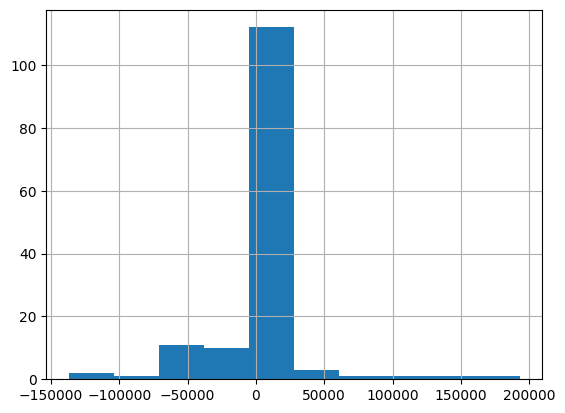

In [65]:
resid.hist()

In [66]:
resid.std()

34182.83337390289

In [67]:
cv = resid.std() / store20.mean() * 100
print(f'{cv:.2f}%')

1.62%


За результатами STL-розкладу коефіцієнт варіації залишкової компоненти становить 1.62%. Це вказує на надзвичайно низький рівень необґрунтованих коливань. Практично вся варіація часового ряду пояснюється трендом і сезонністю, шум мінімальний.
